In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\Users\Lenovo\Downloads\Crop_production analysis")
df.head

<bound method NDFrame.head of             date                 datetime cash_type                 card  \
0     2024-03-01  2024-03-01 10:15:50.520      card  ANON-0000-0000-0001   
1     2024-03-01  2024-03-01 12:19:22.539      card  ANON-0000-0000-0002   
2     2024-03-01  2024-03-01 12:20:18.089      card  ANON-0000-0000-0002   
3     2024-03-01  2024-03-01 13:46:33.006      card  ANON-0000-0000-0003   
4     2024-03-01  2024-03-01 13:48:14.626      card  ANON-0000-0000-0004   
...          ...                      ...       ...                  ...   
1128  2024-07-31  2024-07-31 20:53:35.077      card  ANON-0000-0000-0443   
1129  2024-07-31  2024-07-31 20:59:25.013      card  ANON-0000-0000-0040   
1130  2024-07-31  2024-07-31 21:26:26.000      card  ANON-0000-0000-0444   
1131  2024-07-31  2024-07-31 21:54:11.824      card  ANON-0000-0000-0445   
1132  2024-07-31  2024-07-31 21:55:16.570      card  ANON-0000-0000-0446   

      money          coffee_name  
0     38.70           

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1133 non-null   object 
 1   datetime     1133 non-null   object 
 2   cash_type    1133 non-null   object 
 3   card         1044 non-null   object 
 4   money        1133 non-null   float64
 5   coffee_name  1133 non-null   object 
dtypes: float64(1), object(5)
memory usage: 53.2+ KB


In [19]:
df.isnull().sum()

date            0
datetime        0
cash_type       0
card           89
money           0
coffee_name     0
dtype: int64

In [20]:
#treating the null values in 'card'
df['card'].fillna('UNKNOWN', inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_16980\2286931950.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['card'].fillna('UNKNOWN', inplace=True)


In [21]:
df.isnull().sum()

date           0
datetime       0
cash_type      0
card           0
money          0
coffee_name    0
dtype: int64

In [31]:
df['date'] = pd.to_datetime(df['date'])
df['datetime'] = pd.to_datetime(df['datetime'])

In [32]:
df.dtypes

date           datetime64[ns]
datetime       datetime64[ns]
cash_type              object
card                   object
money                 float64
coffee_name            object
z_score               float64
dtype: object

In [33]:
df.columns

Index(['date', 'datetime', 'cash_type', 'card', 'money', 'coffee_name',
       'z_score'],
      dtype='object')

In [34]:
#treating outliers
from scipy import stats

df['z_score'] = stats.zscore(df['money'])
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
# Remove outliers from the dataset
df = df[(df['z_score'] <= 3) & (df['z_score'] >= -3)]


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   z_score      1133 non-null   float64       
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 62.1+ KB


In [37]:
#Feature engineering
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['day'] = df['datetime'].dt.day
df['day_of_week'] = df['datetime'].dt.dayofweek
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1133 non-null   datetime64[ns]
 1   datetime     1133 non-null   datetime64[ns]
 2   cash_type    1133 non-null   object        
 3   card         1133 non-null   object        
 4   money        1133 non-null   float64       
 5   coffee_name  1133 non-null   object        
 6   z_score      1133 non-null   float64       
 7   year         1133 non-null   int32         
 8   month        1133 non-null   int32         
 9   day          1133 non-null   int32         
 10  day_of_week  1133 non-null   int32         
dtypes: datetime64[ns](2), float64(2), int32(4), object(3)
memory usage: 79.8+ KB


In [41]:
df = pd.get_dummies(df, columns=['coffee_name'])


In [42]:
df['log_money'] = np.log1p(df['money'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1133 non-null   datetime64[ns]
 1   datetime                         1133 non-null   datetime64[ns]
 2   cash_type                        1133 non-null   object        
 3   card                             1133 non-null   object        
 4   money                            1133 non-null   float64       
 5   z_score                          1133 non-null   float64       
 6   year                             1133 non-null   int32         
 7   month                            1133 non-null   int32         
 8   day                              1133 non-null   int32         
 9   day_of_week                      1133 non-null   int32         
 10  log_money                        1133 non-null   float64    

In [39]:
#analysing data by card(customer)
customer_df = df.groupby('card').agg({
    'money': ['sum', 'mean', 'count'],
    'datetime': ['min', 'max'],
    'coffee_name': lambda x: x.mode()[0]
})
customer_df.columns = ['total_spent', 'avg_spent', 'purchase_count', 'first_purchase', 'last_purchase', 'favorite_coffee']


In [44]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 447 entries, ANON-0000-0000-0001 to UNKNOWN
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   total_spent      447 non-null    float64       
 1   avg_spent        447 non-null    float64       
 2   purchase_count   447 non-null    int64         
 3   first_purchase   447 non-null    datetime64[ns]
 4   last_purchase    447 non-null    datetime64[ns]
 5   favorite_coffee  447 non-null    object        
 6   cluster          447 non-null    int32         
dtypes: datetime64[ns](2), float64(2), int32(1), int64(1), object(1)
memory usage: 26.2+ KB


In [43]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
customer_df['cluster'] = kmeans.fit_predict(customer_df[['total_spent', 'avg_spent', 'purchase_count']])


In [45]:
from datetime import datetime
df['recency'] = (datetime.now() - df['datetime']).dt.days
df['frequency'] = df.groupby('card')['datetime'].transform('count')
df['monetary'] = df.groupby('card')['money'].transform('sum')


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1133 entries, 0 to 1132
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   date                             1133 non-null   datetime64[ns]
 1   datetime                         1133 non-null   datetime64[ns]
 2   cash_type                        1133 non-null   object        
 3   card                             1133 non-null   object        
 4   money                            1133 non-null   float64       
 5   z_score                          1133 non-null   float64       
 6   year                             1133 non-null   int32         
 7   month                            1133 non-null   int32         
 8   day                              1133 non-null   int32         
 9   day_of_week                      1133 non-null   int32         
 10  log_money                        1133 non-null   float64    

EXPLARATORY DATA ANALYSIS

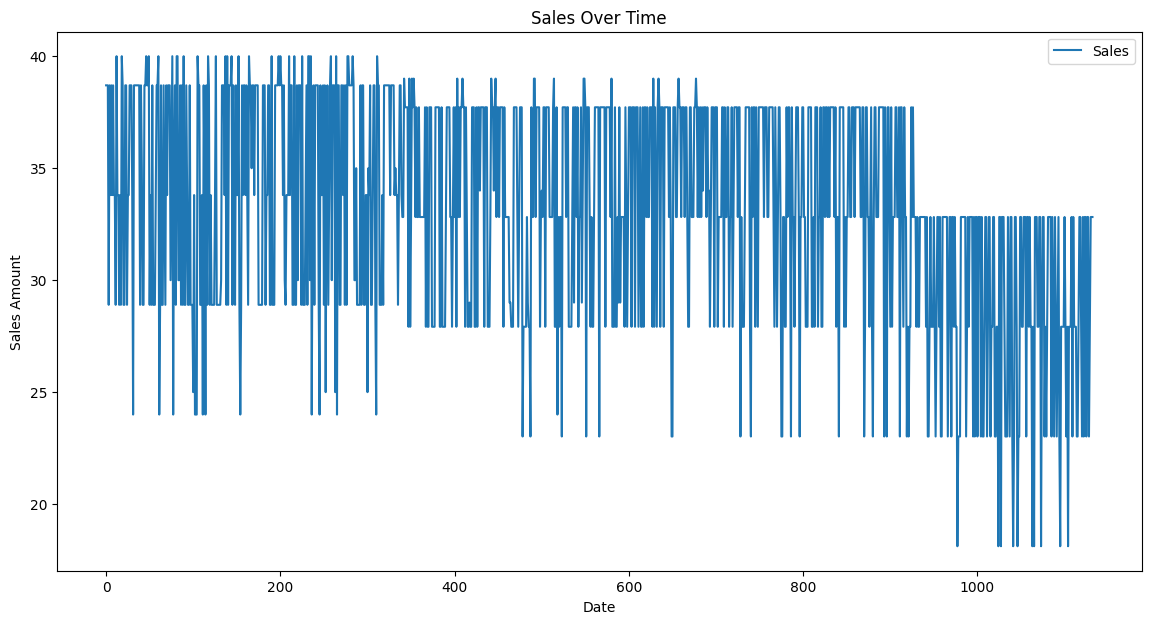

In [47]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['money'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()


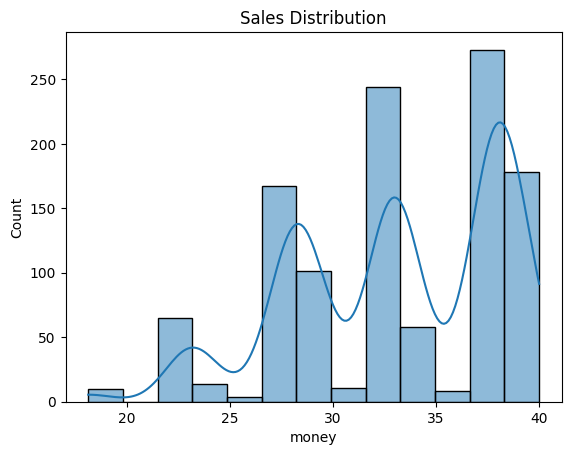

In [49]:
import seaborn as sns

sns.histplot(df['money'], kde=True)
plt.title('Sales Distribution')
plt.show()


In [50]:
top_customers = df.groupby('card')['money'].sum().sort_values(ascending=False)
print(top_customers.head(10))


card
UNKNOWN                3186.00
ANON-0000-0000-0012    2593.18
ANON-0000-0000-0009    2212.70
ANON-0000-0000-0097     882.22
ANON-0000-0000-0040     706.36
ANON-0000-0000-0003     651.96
ANON-0000-0000-0001     646.14
ANON-0000-0000-0141     474.64
ANON-0000-0000-0180     442.84
ANON-0000-0000-0024     422.26
Name: money, dtype: float64


In [51]:
combined_df = pd.concat([df.reset_index(), customer_df.reset_index()], axis=1)

# Save to CSV
combined_df.to_csv('combined_data.csv', index=False)